# Sensitivity and specificity

In real life, the outcome of interest is measured with imperfect test. Misclassification induced by such an imperfect diagnostic test will lead to biased estimates of the odds ratios and their variances. In that regard, it is important to consider *sensitivity* and *specificity* of the diagnostic. Prior information of these quantities lead to a bivariate analysis {cite:t}`guo2017bayesian`. As we have already mentioned, the definitions of *sensitivity* and
*specificity* can be expressed as below: 

Let $Y_i$ be the indicator function of the $i^{th}$ individual's exposure to the disease, and $T_i$
indicating whether the test of the $i^{th}$ individual is positive at time
$t$ with $\Pr(X = 1) = \theta$ and $\Pr(T = 1) = p$. We say that
$\theta$ is the prevalence and $p$ is the apparent prevalence in the
population. 

**Specificity**
  Probability of a negative test correctly identified. In mathematical terms,
  conditioned on $Y = 0$, the *specificity* $\gamma_e$ is the probability of $T = 0$:
  
  \begin{equation}
    \gamma_e = \Pr(T = 0|Y = 0). 
  \end{equation} 

**Sensitivity**
  Probability of a positive test correctly identified. In mathematical terms,
  conditioned on $Y = 1$, the *sensitivity* $\gamma_s$ is the probability of $T = 1$: 
  
  \begin{equation}
    \gamma_s = \Pr(T = 1|Y = 1). 
  \end{equation} 

These quantities are related by the following equation:

  \begin{equation}
    p = \gamma_s\theta + (1-\gamma_e)(1-\theta).
  \end{equation}

## How can we model these quantities 

We know that these quantities are defined in the square $[0,1] \times [0,1]$,
since they are probabilities. In the model section, we will see that they are
treated as constant for all individuals, that is, their distributions do not
change from individual to individual. Because of that, we only need to specify
a probability distribution over this space. For the prior distribution, prior
information about has to influence our choice of this distribution. We could
define independent Beta distributions for sensitivity and specificity, since
this distribution is very flexible and conjugate with the Binomial (which can
be used to model number of positive tests in exposed individuals, for
instance). However, we want to consider the correlation between them, which is
observed by specialists. Below we see this effect on the study
{cite}`peng2020diagnostic`. Note that the dependence seems not to be linear,
though. 

Hence, to consider this correlation, we will use the work of
{cite:t}`olkin2015constructions`, a Bivariate Beta distribution. 

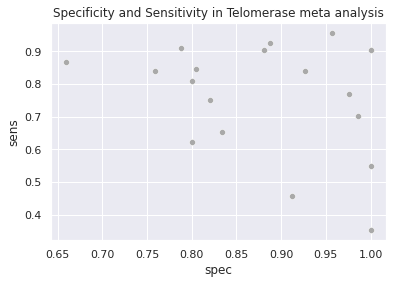

In [34]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

telomerase_data = pd.read_csv('../data/telomerase_meta_analysis.csv', delim_whitespace=True)
telomerase_data['sens'] = telomerase_data.apply(lambda x: x['TP'] / (x['TP'] + x['FN']), axis=1)
telomerase_data['spec'] = telomerase_data.apply(lambda x: x['TN'] / (x['TN'] + x['FP']), axis=1)

sns.scatterplot(data = telomerase_data, x = 'spec', y = 'sens', color = 'darkgrey')
plt.title('Specificity and Sensitivity in Telomerase meta analysis')

plt.show()